# STAD68 Assignment 1

##  Problem 3

Write code to create a synthetic (“made up”) data set that is linearly separable. In particular, write
a procedure that accepts two argument: d the number of dimensions and n the number of examples.
Your code should then output the labeled data. You can choose the format, but a natural one would
be a n × d-matrix for the d-dimensional data x and a n-vector y for the label.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot

In [3]:
def createData(d, n):
    """Returns x and y which x is a n*d matrix of d 
    dimensional features and y is a n dimensional vector
    of labels."""
    
    # generate classification A
    A = np.random.rand(n/2,d)
    Y1 = np.ones(n/2)
    
    # generate classification B
    B = np.random.rand(n - n/2, d) - 2
    Y2 = np.zeros(n-n/2)-np.ones(n-n/2)
    
    # put two classifications into one matrix
    X = np.concatenate((A, B), axis=0)
    Y = np.concatenate((Y1, Y2), axis=0)
    return {'Features':X, 'Label':Y }
    

Visualize the output of your procedure in 2 dimensions and n ∈ {10, 100} data points using a scatter
plot with + symbols for positively labeled examples and − symbols otherwise. Show two random data
sets for each setting.

In [4]:
def visualizeData(dataSet, predictedY):
    
    """VisualizeData outputs a scatter plot with +
       symbols for positively labeled examples 
       and − symbols otherwise, for number n of 2 
       dimensional data points where 10<= n <= 100"""
    
    #res = createData(2, n)
    X = dataSet['Features']
    Y = dataSet['Label']
    
    if X.shape[0] < 10:
        print "The data size is too small, a size ∈ {10, 100} is recommended."
    elif X.shape[0] > 100:
        print "The data size is too large, a size ∈ {10, 100} is recommended."
    else:
        for i in range(len(predictedY)):
            if predictedY[i] == 1:
                symbol = '+'
            elif predictedY[i] == -1:
                # use '_' instead of '-' because there is no such marker
                symbol = '_'
            else:
                # if predictedY is neither 1 or -1 for some reason
                symbol = 'o'
                print "Data can't be classified."
                
            # different colour for misclassified data
            if predictedY[i] == Y[i]:
                col = 'b'
            else:
                col = 'r'
                
            pyplot.scatter(X[i, 0], X[i, 1], marker = symbol, color = col)
        


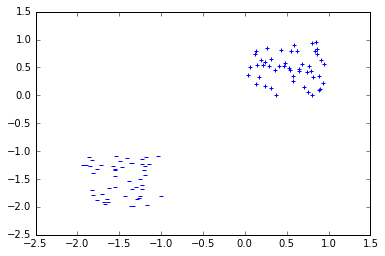

In [5]:
dataSet = createData(2, 99)
visualizeData(dataSet, dataSet['Label'])

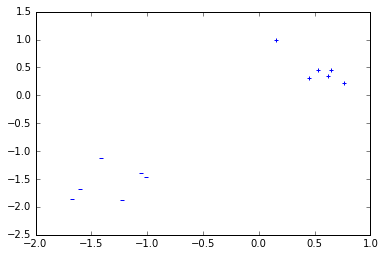

In [6]:
dataSet = createData(2, 12)
visualizeData(dataSet, dataSet['Label'])

Write code that takes as input 1) a linear classifier vH and 2) n observations x1, . . . , xn (e.g., in the form of a matrix), and returns the vector of classifications.

In [7]:
def getClassifications(vH, X):
    
    """Return the vector of classifications by get 
    the sign of vH and X."""

    Y = np.zeros(X.shape[0])
    
    for i in range(X.shape[0]):
        # get the sign of inner product of 
        #a row of data and vH
        d = np.dot(X[i, :], vH)
        if d > 0:
            Y[i] = 1
        elif d < 0:
            Y[i] = -1
        else:
            # if d = 0
            Y[i] = 0
    return Y

Bonus for affine classifiers: 

In [8]:
def getAffineClassifications(vH, X, c):
    
    """Return the vector of classifications by 
    get the sign of vH, X and c where c*||vH|| 
    is the vector that affline hyperplane shifted 
    from the origin."""
    
    if c <= 0:
        print "c should be greater than 0."
    else:
        Y = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            d = np.dot(X[i, :], vH)-c
            if d > 0:
                Y[i] = 1
            elif d < 0:
                Y[i] = -1
        return Y

Visualize the output of your procedure again on a randomly generated 2D data set and the classifier vH = (0 0)T . Make classifications (+/−) that are correct be BLUE and those that are incorrect, RED.

Data can't be classified.
Data can't be classified.
Data can't be classified.
Data can't be classified.
Data can't be classified.
Data can't be classified.
Data can't be classified.
Data can't be classified.
Data can't be classified.
Data can't be classified.
Data can't be classified.
Data can't be classified.


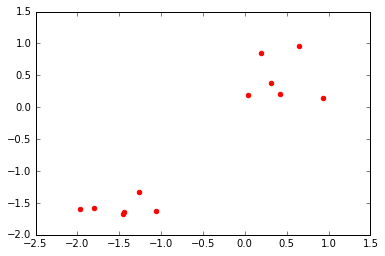

In [9]:
# number of data
n = 12

dataSet = createData(2, n)
X = dataSet['Features']
vH = np.zeros(2)

predictedY = getClassifications(vH, 
                                dataSet['Features'])

visualizeData(dataSet, predictedY)

Bonus for affine classifiers:

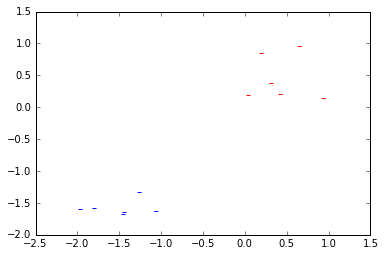

In [10]:
c = 5
predictedY = getAffineClassifications(vH, X, c)

visualizeData(dataSet, predictedY)

Write code to take a dataset and produce a random training–test data split. In particular, write code that takes as input 1) a number k and 2) a labelled data set with at least n > k observations, and outputs a random split of the dataset into two halves: k labeled training and n − k labeled test data.

In [11]:
def dataSplit(k, dataSet):
    X = dataSet['Features']
    Y = dataSet['Label']

    Y = Y.reshape((len(Y), 1))
    # add Y as a new column to features data
    data = np.concatenate((X, Y), axis=1)

    # shuffle the data randomly 
    np.random.shuffle(data)
    
    train = data[:k]
    test = data[k:]
    return {'train': train, 'test': test}

Visualize a full data set of n = 100 examples and a random size n′ = 10 training data set. You can make the visualization side by side, or plot them in the sample plot using color to distinguish those points that are in the training data set.

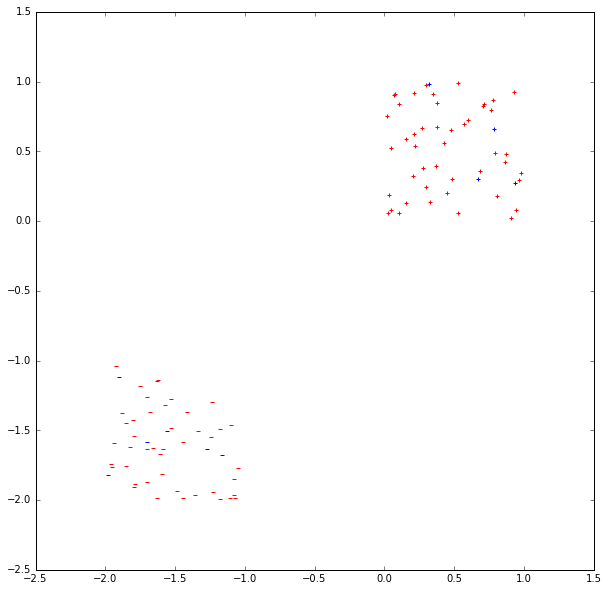

In [12]:
# number of training data
k = 10
# total number of data
n = 100

res = dataSplit(k, createData(2, n))

# change the size of figure
pyplot.figure(1, figsize=(10,10))

data = np.concatenate((res['train'], 
                       res['test']), 
                      axis = 0)

for i in range(data.shape[0]):
    if data[i,-1] == 1:
        symbol = '+'
    elif data[i, -1] == -1:
        # use '_' instead of '-' 
        #because there is no such marker
        symbol = '_'
    else:
        symbol = 'o'
        
    if i < 10:
        col = 'b'
    else:
        col = 'r'
        
    pyplot.scatter(data[i, 0], data[i, 1],
                   marker = symbol, 
                   color = col)

pyplot.show()

Write a procedure that takes 1) an initial classifier vH and 2) a labeled data set, and implements the perceptron algorithm with the step size rule α(k) = 1/k , where k is the number of the current iteration.
The procedure should return the learned classifier vH if the data are linearly separable,or should return an error message otherwise, stating the data are not linearly separable.


In [13]:
def getPerceptron(vH0, data):
    
    # learning rate in format 1/k which is initialized at 1
    alpha = 1
    # k th step
    k = 0
    # maximum margin possible
    M = 0.001
    # radius of the smallest ball containing all the data points
    # set this for 1 because M is small enough
    R = 1
    maxStep = np.square(R/M)
    # norm vector to the hyperplane splitting 2 classifications
    vH = vH0
    # cost function which is 
    # sum of distance of all the misclassified data to the hyperplane
    cost = 0
    
    while k != maxStep:
        for i in range(data.shape[0]):
            
            # get features
            x = data[i, :-1]
            x = x.reshape(1, len(x))
            
            # get predicted label
            predictedY = getClassifications(vH, x)
            
            # compare predicted label to the real label
            if predictedY != data[i, -1]:
                
                # add the distance from this misclassified data
                #point to the hyperplane vH defined
                cost += abs(np.dot(vH, data[i, :-1]))
                
                # update vH only when there are misclassified 
                # data points
                vH += alpha*data[i, -1]*data[i, :-1]
        
        k += 1
        alpha = 1.0/k
        # if there is no misclassified data point 
        if cost == 0:
            break
               
    if cost == 0:
        return vH
    else:
        print "Data is not linearly seperatable or the optimal margin is too small."
    

Bonus for affine classifiers:

In [14]:
def getAffinePerceptron(vH0, data, c):
    
    # learning rate in format 1/k which is initialized at 1
    alpha = 1
    # k th step
    k = 0
    # maximum margin possible
    M = 0.001
    # radius of the smallest ball containing all the data points
    # set this for 1 because M is small enough
    R = 1
    
    # complexity will not be larger than (R/M)^2
    maxStep = np.square(R/M)
   
    # cost function which is 
    # sum of distance of all the misclassified data to the hyperplane
    cost = 0
    
    z = np.zeros(len(vH0) + 1)
    z[:-1] = vH0
    z[-1] = -c
    z = z.reshape(1, len(z))
    
    while k != maxStep:
        for i in range(data.shape[0]):
            
            # get features
            x = data[i, :-1]
            xH = np.zeros(len(x) + 1)
            xH[:-1] = x
            xH[-1] = 1
            xH = xH.reshape(1, len(xH))
            # get predicted label
            predictedY = getAffineClassifications(z[0, :-1], xH[:, :-1], -z[0, -1])
            
            # compare predicted label to the real label
            if predictedY != data[i, -1]:
                # add the distance from this misclassified data 
                # point to the hyperplane vH defined
                cost += abs(z[0, 0]*xH[0, 0]+z[0, 1]*xH[0, 1]+z[0, 2]*xH[0, 2])
                #xH = np.array(xH) 
                #cost += abs(np.dot(z, xH))
                
                # update only when there are misclassified data points
                z += alpha*data[i, -1]*xH;    
        
        k += 1
        alpha = 1.0/k
        # if there is no misclassified data point 
        if cost == 0:
            break
    if cost == 0:
        return z
    else:
        print "Data is not linearly seperatable or the optimal margin is too small."
    
    

Generate a random linearly separable data set of n = 10 data points, run the perceptron classifier, and visualize the linear boundary. Repeat the same procedure on a data set that is not linearly separable (you can create such a data set by hand, if you wish). Demonstrate that your program recognizes that the data are not linearly separable.

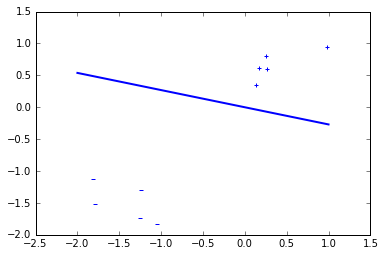

In [15]:
# Generate a random linearly separable data set of n = 10 
n = 10
# output is a dictionary of 1 Features matrix X and 1 Label vector Y
res = createData(2, n)
X = res['Features']
Y = res['Label']
Y = Y.reshape((len(Y), 1))

# concatenate x and Y into one matrix
data = np.concatenate((X, Y), axis=1)

# initialize vH0 to (0,0)
vH0 = np.zeros(2)

# find a hyperplane that sperates 2 classifications
vH = getPerceptron(vH0, data)

# visualize the linear boundary
visualizeData(res, Y)
xx = np.linspace(-2.0, 1.0)

# vH[0]/(-vH[1])  is slope
yy = xx*vH[0]/(-vH[1]) 
pyplot.plot(xx, yy, linewidth=2.0)
pyplot.show()

Bonus for affine classifiers for linearly separable data:

In [16]:
# find a hyperplane that sperates 2 classifications
c = 0.1
z = getAffinePerceptron(vH0, data, c)

print z

[[ 0.1642264   0.60976019 -0.1       ]]


Data is not linearly seperatable or the optimal margin is too small.


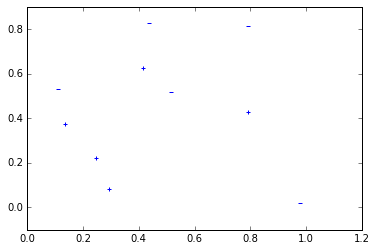

In [17]:
# Generate a random non-linearly separable data set of n = 10 
X = np.random.rand(n,2)
Y1 = np.ones(n/2)
Y2 = np.zeros(n-n/2)-np.ones(n-n/2)
Y = np.concatenate((Y1, Y2), axis=0)
res = {'Features': X, 'Label': Y}
Y = Y.reshape((len(Y), 1))

# concatenate x and Y into one matrix
data = np.concatenate((X, Y), axis=1)

# initialize vH0 to (0,0)
vH0 = np.zeros(2)

# find a hyperplane that sperates 2 classifications
vH = getPerceptron(vH0, data)
visualizeData(res, Y)


Bonus for affine classifiers for non linearly separable data:

c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater than 0.
c should be greater 

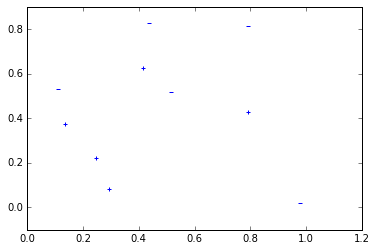

In [18]:
# find a hyperplane that sperates 2 classifications
c = 0.1
vH = getAffinePerceptron(vH0, data, c)

# visualize data
visualizeData(res, Y)